# Q-1 

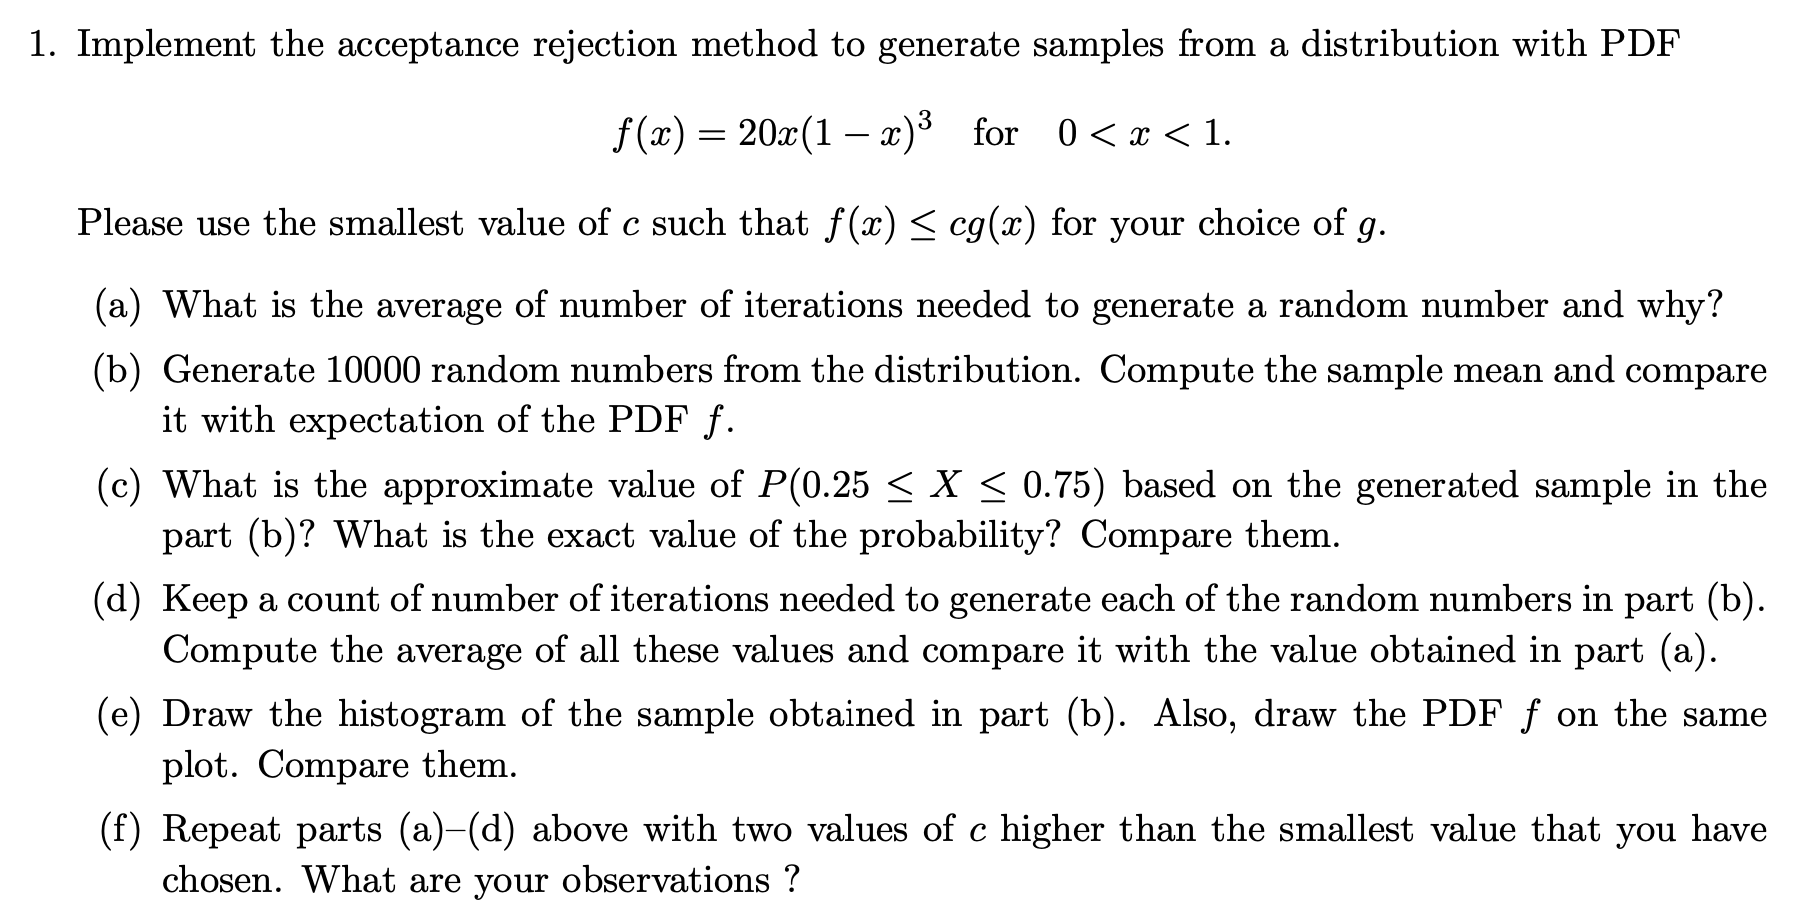

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def target_dist(x):                    # f(x)
    return 20 * x * ((1 - x) ** 3)


def proposal_dist(x):                  # g(x)
    return 1


def acceptance_rejection_sampling(num_samples, c):
    accepted_samples = list()
    iterations_needed = list()
    i = 0
    
    while i < num_samples:
        itr = 0
        while True:
            itr += 1
            x = np.random.uniform(0, 1)
            y = np.random.uniform(0, 1)
            if y <= target_dist(x) / (c * proposal_dist(x)):
                accepted_samples.append(x)
                iterations_needed.append(itr)
                i += 1
                break
            

    return accepted_samples, iterations_needed

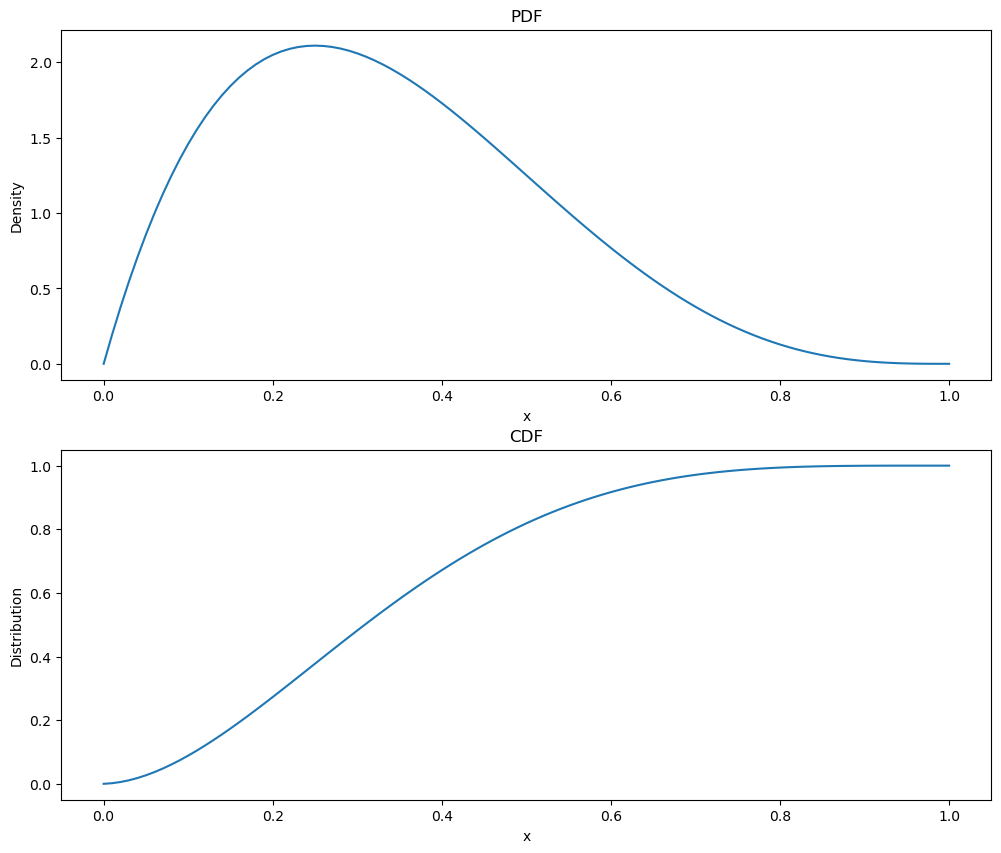

In [3]:
# Visualize target distribution's PDF and CDF.
stepSize = 0.01
start, stop = 0, 1 + stepSize

x = np.arange(start, stop, stepSize)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(x, target_dist(x))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('PDF')


plt.subplot(2, 1, 2)
plt.plot(x, np.cumsum(target_dist(x)) / np.sum(target_dist(x)))
plt.xlabel('x')
plt.ylabel('Distribution')
plt.title('CDF')

plt.show()

## Choosing g(x) as uniform distribution's PDF. Maximum value of f(x) is 135/64 (2.109375) at x = 0.25.
## The value for c for the chosen g(x) will be 135/64 (2.109375).

For c: 2.109375

(a)
Average number of iterations needed to generate a random number: 2.109375

(b)
Empirical sample mean of the distribution: 0.33636274063079824
Expected sample mean of the distribution: 0.3333333333333333

(c)
Empirical value of P(0.25 ≤ X ≤ 0.75): 0.5977526641857913
Exact value of P(0.25 ≤ X ≤ 0.75): 0.617188

(d)
Average number of iterations needed to generate a random number from part(a): 2.109374985410495
Expected number of iterations by averaging iterations per sample: 2.1171

(e)


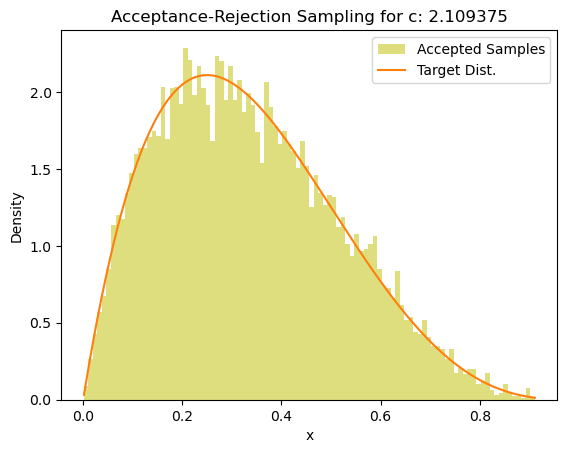

For c: 5

(a)
Average number of iterations needed to generate a random number: 5

(b)
Empirical sample mean of the distribution: 0.3333260307264442
Expected sample mean of the distribution: 0.3333333333333333

(c)
Empirical value of P(0.25 ≤ X ≤ 0.75): 0.5990406215399493
Exact value of P(0.25 ≤ X ≤ 0.75): 0.617188

(d)
Average number of iterations needed to generate a random number from part(a): 2.1093749984370516
Expected number of iterations by averaging iterations per sample: 4.9558

(e)


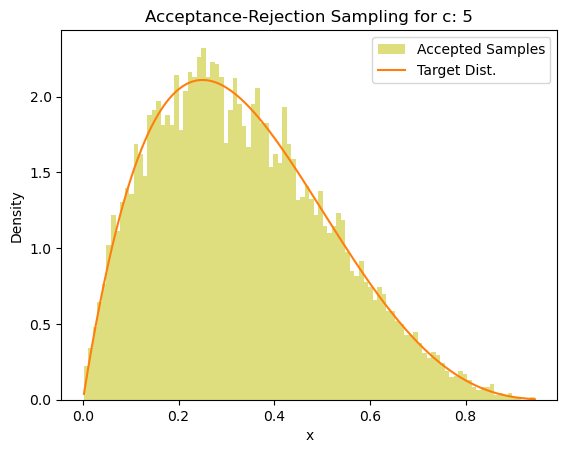

For c: 10

(a)
Average number of iterations needed to generate a random number: 10

(b)
Empirical sample mean of the distribution: 0.33382695586956895
Expected sample mean of the distribution: 0.3333333333333333

(c)
Empirical value of P(0.25 ≤ X ≤ 0.75): 0.6043540815850008
Exact value of P(0.25 ≤ X ≤ 0.75): 0.617188

(d)
Average number of iterations needed to generate a random number from part(a): 2.1093749999157603
Expected number of iterations by averaging iterations per sample: 9.8473

(e)


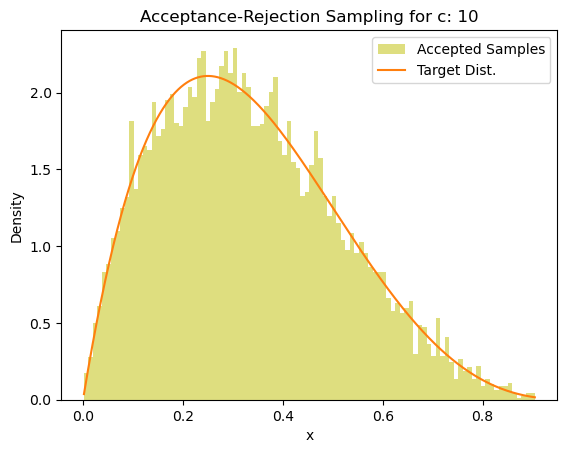

In [4]:
num_samples = 10000
x = np.arange(0, 1, 0.01)
c = np.max(target_dist(x))
C = [c, 5, 10]

for c in C:
    print(f"For c: {c}\n")
    accepted_samples, iterations_needed = acceptance_rejection_sampling(num_samples, c)
    accepted_samples, iterations_needed = np.array(accepted_samples),  np.array(iterations_needed)
    
    print("(a)")
    expected_c = np.max(target_dist(accepted_samples))
    print(f"Average number of iterations needed to generate a random number: {c}\n")
    
    print("(b)")
    print(f"Empirical sample mean of the distribution: {np.mean(accepted_samples)}")
    print(f"Expected sample mean of the distribution: {1 / 3}\n")

    print("(c)")
    # Approximate value of P(0.25 ≤ X ≤ 0.75).
    max_sum = np.sum(target_dist(accepted_samples))
    sample_bitmask = np.logical_and(accepted_samples >= 0.25, accepted_samples <= 0.75)
    empirical_value = np.sum(target_dist(accepted_samples[sample_bitmask]) / max_sum)

    print(f"Empirical value of P(0.25 ≤ X ≤ 0.75): {empirical_value}")
    print(f"Exact value of P(0.25 ≤ X ≤ 0.75): {0.617188}\n")
    
    print("(d)")
    print(f"Average number of iterations needed to generate a random number from part(a): {expected_c}")
    print(f"Expected number of iterations by averaging iterations per sample: {np.mean(iterations_needed)}\n")

    print("(e)")
    plt.hist(accepted_samples, density=True, bins=100, alpha=0.5, color='y', label="Accepted Samples")
    plt.plot(np.sort(accepted_samples), target_dist(np.sort(accepted_samples)), color='tab:orange', label="Target Dist.")
    plt.title(f"Acceptance-Rejection Sampling for c: {c}")
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f"AR_task1_{c}.png")
    plt.show()

# Q-2

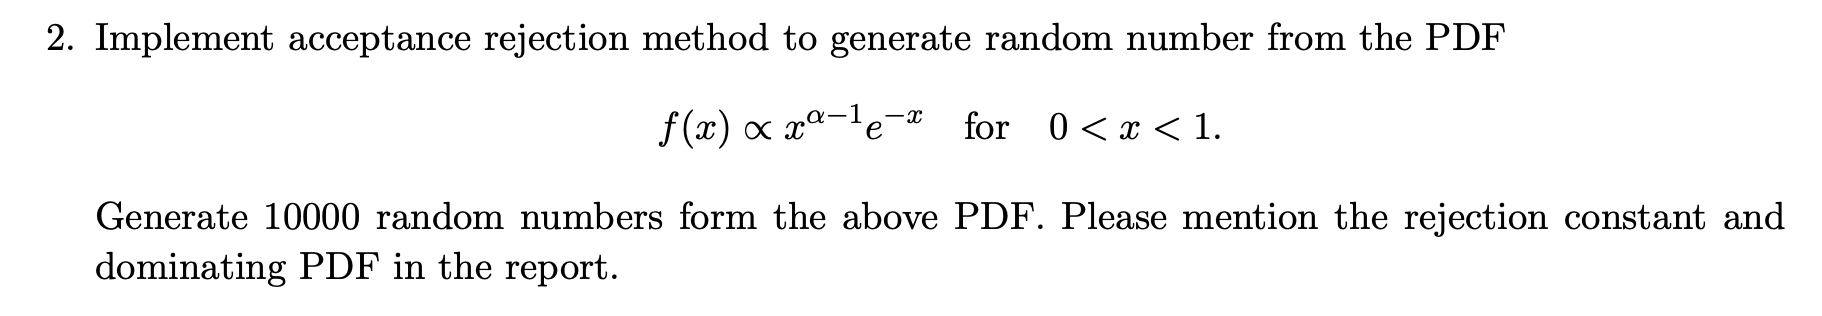

## Strategy.
1) Generate a number U from U(0, 1). <br>
2) Use inverse transform of dominating dist to transfrom presumed CDF (U) to domain (x).  <br>
3) Convert domain (x) to PDF of dominating function g(x).  <br>
4) Generate a number U1 from U(0, 1).  <br>
5) Accept (x) if U1 <= f(x) / (c * g(x)).

In [6]:
# Considering beta = 1 and alpha = 0.5. DIVIDE F(X) BY 0.8427017714661063 because this f(X) IS A PDF.
# AND ITS CDF SHOULD BE 1 AS X -> 1.
def target_dist(x, alpha):
    return ((x ** (alpha - 1)) * (np.exp(-x))) / (np.math.gamma(alpha) * 0.8427017714661063)
    

def proposal_dist(x, alpha):
    A = (1 / alpha) + (1 / np.e)
    
    if 0 < x < 1:
        return (x ** (alpha - 1)) / A
    elif x >= 1:
        return np.exp(-x) / A
    else:
        return 0
    

def inv_proposal_dist(u, alpha): 
    A = (1 / alpha) + (1 / np.e)
    
    if 0 < u < 1 / (alpha * A):
        return (alpha * A * u) ** (1 / alpha)
    elif 1 / (alpha * A) <= u < 1:
        return -np.log(A) - np.log(1 - u)
    else:
        return 0
    
    
def acceptance_rejection_sampling(num_samples, c, alpha):
    accepted_samples = list()
    i = 0
    
    while i < num_samples:
        u1 = np.random.uniform()
        x = inv_proposal_dist(u1, alpha)
        u2 = np.random.uniform()
            
        if c * proposal_dist(x, alpha) * u2 <= target_dist(x, alpha) and 0 < x < 1:
            accepted_samples.append(x)
            i += 1
            
    return accepted_samples

For c: 1.33593291580581



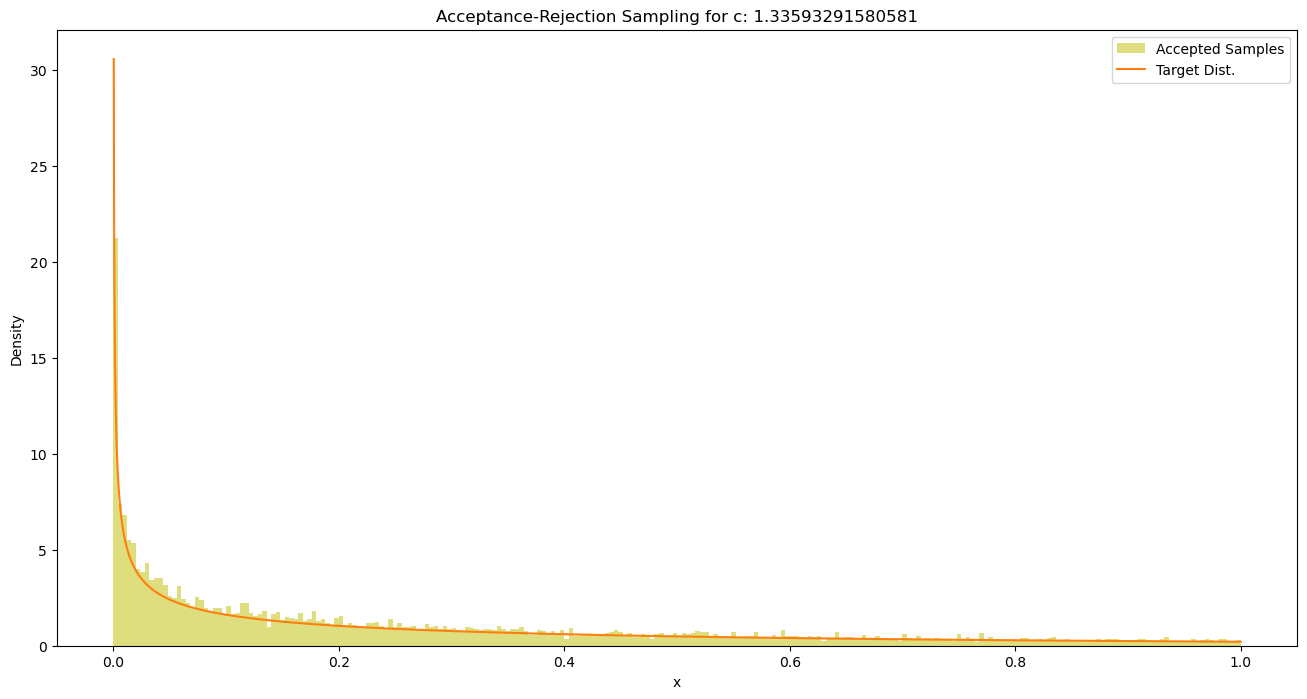

In [14]:
num_samples = 10000
alpha = 0.5
A = (1 / alpha) + 1 / np.exp(1)
c = A / np.math.gamma(alpha)


print(f"For c: {c}\n")
# accepted_samples = acceptance_rejection_sampling(num_samples, c, alpha)
# accepted_samples = np.array(accepted_samples)
accepted_samples = acceptance_rejection_sampling(num_samples, c, alpha)
accepted_samples = np.array(accepted_samples)


plt.figure(figsize=(16, 8))
plt.hist(accepted_samples, density=True, bins=250, alpha=0.5, color='y', label="Accepted Samples")
plt.plot(np.sort(accepted_samples)[250:], target_dist(np.sort(accepted_samples), alpha)[250:], color='tab:orange', label="Target Dist.")
plt.title(f"Acceptance-Rejection Sampling for c: {c}")
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.savefig(f"AR_task2_{c}.png")
plt.show()

In [15]:
#NOTE RESULTS MAY BE DIFFERENT EVERYTIME THIS PROGRAM IS RUN AS RANDOM SEED IS NOT SET.